# Decision Dependent Games Simulation
## Synthetic Linear Regression Problem with Location Families

We extend the linear regression example from Miller et. al. (http://arxiv.org/abs/2102.08570) to the multiplayer framework where the models of each player affect the distributions of data seen by all.

In [1]:
import numpy as np
import sys
import ipdb
from tqdm import tqdm, trange

sys.path.append("../")

sys.path.append("../utils/")
from utils_functions import *

from dd_game import *
from two_stage_player import *
from dfo_player import *
from solo_player import *
from rgd_player import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

np.random.seed(10)

# Configurations

In [2]:
d_1 = 2  # Dimension of each player's data/strategy
d_2 = 2

epsilon_0 = 0.3
epsilon_1 = 0.3 # Epsilon sensitivity parameters from the paper
epsilon_2 = 0.3

epsilon_nl = 1

Sigma_x_p1 = np.eye(d_1)  # Covariance of x^k
Sigma_x_p2 = np.eye(d_2)

sigma_y_p1 = 0.1  # Variance of y^k
sigma_y_p2 = 0.1

beta_p1 = np.random.normal(size=d_1)  # Linear parameter vector
beta_p2 = np.random.normal(size=d_2)

# s_1 = sample_sphere(epsilon_1,d_1+d_2)  # Performativity parameters
# mu_p1 = s_1[0:d_1]
# gamma_p1 = s_1[d_1:]
# s_2 = sample_sphere(epsilon_2,d_1+d_2)
# mu_p2 = s_2[0:d_2]
# gamma_p2 = s_2[d_2:]

mu_p1 = sample_sphere(epsilon_0,d_1)
gamma_p1 = sample_sphere(epsilon_1,d_2)
mu_p2 = sample_sphere(epsilon_0,d_2)
gamma_p2 = sample_sphere(epsilon_2,d_1)

In [3]:
print(beta_p1)
print(beta_p2)
print(mu_p1)
print(gamma_p1)
print(mu_p2)
print(gamma_p2)

[1.3315865  0.71527897]
[-1.54540029 -0.00838385]
[ 0.19598547 -0.22713365]
[0.27768968 0.11352727]
[ 0.00737136 -0.29990942]
[0.10160187 0.28227125]


In [4]:
p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
p1_data_generating_func = lambda x0,x1,x2,x3,x4,x5,x6: sample_from_nonlinear_family(x0,x1,x2,x3,x4,x5,x6,epsilon_nl)

p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
p2_data_generating_func = lambda x0,x1,x2,x3,x4,x5,x6: sample_from_nonlinear_family(x0,x1,x2,x3,x4,x5,x6,epsilon_nl)

p3_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
p3_data_generating_func = sample_from_location_family

p4_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
p4_data_generating_func = sample_from_location_family

In [5]:
num_rounds_lst = np.logspace(1,4,5,dtype='int')
num_alternate_rounds = 100
num_test = 1000

# Run game with 2-stage algorithm, nonlinear distribution map

In [6]:
p1_risks = []
p2_risks = []
theta_final_p1 = []
theta_final_p2 = []

for num_rounds in num_rounds_lst:
    print(f"num_rounds = {num_rounds}")
    player_two = TwoStagePlayer()
    player_one = TwoStagePlayer()
    game = DecisionDependentGame(player_one, player_two,
                                 p1_data_params, p2_data_params,
                                 p1_data_generating_func, p2_data_generating_func,
                                 num_rounds, num_alternate_rounds, num_test)
    
    game.run_train()
    game.run_post_train_alternating()
    
    PR1, PR2 = game.evaluate_closed_perf_risk()
    p1_risks.append(PR1)
    p2_risks.append(PR2)
    
    theta_final_p1.append(game.theta_p1)
    theta_final_p2.append(game.theta_p2)
    
    #Change this flag if one wants to change print settings
    if False:
        print("---------------------")
        print("Player 1: Actual mu, gamma")
        print(mu_p1, gamma_p1)
        print("Player 1: Estimated mu, gamma")
        print(player_one.mu_hat, player_one.gamma_hat)

        print("Player 2: Actual mu, gamma")
        print(mu_p2, gamma_p2)
        print("Player 2: Estimated mu, gamma")
        print(player_two.mu_hat, player_two.gamma_hat)
        print("---------------------")

num_rounds = 10
num_rounds = 56
num_rounds = 316
num_rounds = 1778
num_rounds = 10000


# Run game with 2-stage algorithm, Location family distribution map

In [7]:
p3_risks = []
p4_risks = []
theta_final_p3 = []
theta_final_p4 = []

for num_rounds in num_rounds_lst:
    print(f"num_rounds = {num_rounds}")
    player_three = TwoStagePlayer()
    player_four = TwoStagePlayer()
    game = DecisionDependentGame(player_three, player_four,
                                 p3_data_params, p4_data_params,
                                 p3_data_generating_func, p4_data_generating_func,
                                 num_rounds, num_alternate_rounds, num_test)
    
    game.run_train()
    game.run_post_train_alternating()
    
    PR3, PR4 = game.evaluate_closed_perf_risk()
    p3_risks.append(PR1)
    p4_risks.append(PR2)
    
    theta_final_p3.append(game.theta_p1)
    theta_final_p4.append(game.theta_p2)
    
    #Change this flag if one wants to change print settings
    if False:
        print("---------------------")
        print("Player 1: Actual mu, gamma")
        print(mu_p3, gamma_p3)
        print("Player 1: Estimated mu, gamma")
        print(player_three.mu_hat, player_three.gamma_hat)

        print("Player 2: Actual mu, gamma")
        print(mu_p4, gamma_p4)
        print("Player 2: Estimated mu, gamma")
        print(player_four.mu_hat, player_four.gamma_hat)
        print("---------------------")

num_rounds = 10
num_rounds = 56
num_rounds = 316
num_rounds = 1778
num_rounds = 10000


In [8]:
theta_PO_1, theta_PO_2 = game.solve_nash()
theta_SO_1, theta_SO_2 = game.solve_social_opt()
theta_final_p1 = np.array(theta_final_p1)
theta_final_p2 = np.array(theta_final_p2)
theta_final_p3 = np.array(theta_final_p3)
theta_final_p4 = np.array(theta_final_p4)

In [9]:
if False:
    print(mu_p1, gamma_p1)
    print(player_one.mu_hat.round(2), player_one.gamma_hat.round(2))

    print(mu_p2, gamma_p2)
    print(player_two.mu_hat.round(2), player_two.gamma_hat.round(2))

    print(game.solve_nash())
    print(game.solve_social_opt())
    
    print(game.evaluate_test_perf_risk_p1().round(3))
    print(game.evaluate_test_perf_risk_p2().round(3))

In [10]:
game.theta_p1, game.theta_p2 = game.solve_nash()
PO_1, PO_2 = game.evaluate_closed_perf_risk()
print(f'Player 1 PO = {PO_1.round(3)}\tPlayer 2 PO = {PO_2.round(3)}')

Player 1 PO = 0.098	Player 2 PO = 0.096


In [11]:
game.theta_p1 = np.array([1.35682, 0.581561])
game.theta_p2 = np.array([-1.47398, 0.0999326])
SO_1, SO_2 = game.evaluate_closed_perf_risk()
print(f'Player 1 SO = {SO_1.round(3)}\tPlayer 2 SO = {SO_2.round(3)}')

Player 1 SO = 0.094	Player 2 SO = 0.093


## Checking stage 1

In [12]:
print(player_one.mu_hat, player_one.gamma_hat)
print(player_two.mu_hat, player_two.gamma_hat)

[ 0.15517107 -0.25468331] [0.26170221 0.10144087]
[ 0.03782617 -0.31696142] [0.06600813 0.23354149]


In [13]:
print(mu_p1, gamma_p1)
print(mu_p2, gamma_p2)

[ 0.19598547 -0.22713365] [0.27768968 0.11352727]
[ 0.00737136 -0.29990942] [0.10160187 0.28227125]


## Plots

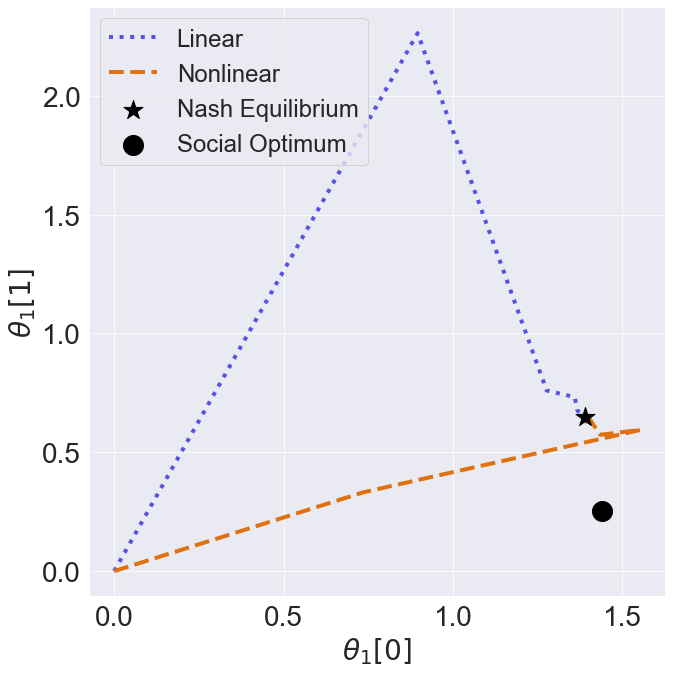

In [14]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 28
plt.rcParams['axes.linewidth'] = 4

x3 = np.insert(np.array(theta_final_p3)[:,0],0,0)
y3 = np.insert(np.array(theta_final_p3)[:,1],0,0)
plt.plot(x3,y3,
         ls='dotted',label='Linear', color='#5553E6', lw=4)

x1 = np.insert(np.array(theta_final_p1)[:,0],0,0)
y1 = np.insert(np.array(theta_final_p1)[:,1],0,0)
plt.plot(x1,y1,
         '--', color='#E07110', label='Nonlinear', lw=4)

x_nash_p1 = theta_PO_1[0]
y_nash_p1 = theta_PO_1[1]
plt.scatter(x_nash_p1, y_nash_p1,
            label='Nash Equilibrium', marker='*', color='k', s=400, zorder=10)

x_so_p1 = theta_SO_1[0]
y_so_p1 = theta_SO_1[1]
plt.scatter(x_so_p1, y_so_p1,
            label='Social Optimum', marker='o', color='k', s=400, zorder=10)

# x_so_p1 = 1.35682
# y_so_p1 = 0.581561
# plt.scatter(x_so_p1, y_so_p1,
#             label='Social Optimum', marker='o', color='k', s=400, zorder=10)


plt.legend(loc='best',fontsize=24)
plt.xlabel(r"$\theta_1[0]$")
plt.ylabel(r"$\theta_1[1]$")
plt.tight_layout()
plt.savefig('../figures/DD_regression_trajectory_nonlinear.jpg', format='jpg')
plt.show()

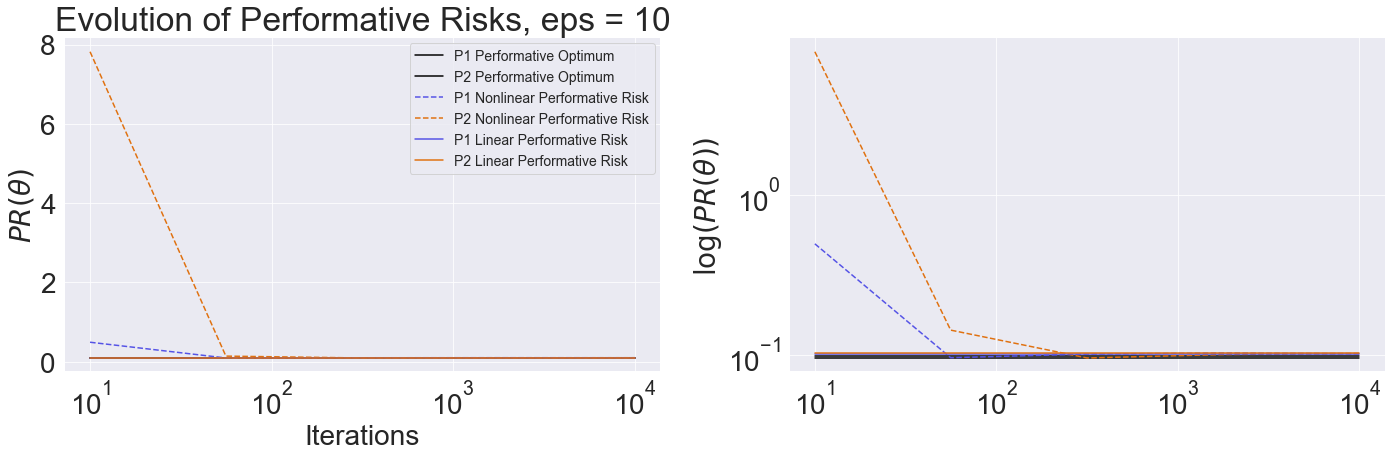

In [15]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.semilogx(num_rounds_lst, [PO_1 for i in num_rounds_lst],
             '-', color='k', label='P1 Performative Optimum')
plt.semilogx(num_rounds_lst, [PO_2 for i in num_rounds_lst],
             '-', color='k', label='P2 Performative Optimum') 

plt.semilogx(num_rounds_lst, p1_risks,
             '--', color='#5553E6', label='P1 Nonlinear Performative Risk')
plt.semilogx(num_rounds_lst, p2_risks,
             '--', color='#E07110', label='P2 Nonlinear Performative Risk')

plt.semilogx(num_rounds_lst, p3_risks,
             '-', color='#5553E6', label='P1 Linear Performative Risk')
plt.semilogx(num_rounds_lst, p4_risks,
             '-', color='#E07110', label='P2 Linear Performative Risk')

plt.xlabel("Iterations")
plt.ylabel(r"$PR(\theta)$")
plt.title("Evolution of Performative Risks, eps = 10")
plt.legend(fontsize=14)

plt.subplot(1,2,2)
plt.loglog(num_rounds_lst, [PO_1 for i in num_rounds_lst],
           '-', color='k', label='P1 Performative Optimum')
plt.loglog(num_rounds_lst, [PO_2 for i in num_rounds_lst],
           '-', color='k', label='P2 Performative Optimum')

plt.loglog(num_rounds_lst, p1_risks,
           '--', color='#5553E6', label='P1 Nonlinear Performative Risk')
plt.loglog(num_rounds_lst, p2_risks,
           '--', color='#E07110', label='P2 Nonlinear Performative Risk')

plt.loglog(num_rounds_lst, p3_risks,
           '-', color='#5553E6', label='P1 Linear Performative Risk')
plt.loglog(num_rounds_lst, p4_risks,
           '-', color='#E07110', label='P2 Linear Performative Risk')
plt.ylabel(r"$\log(PR(\theta))$")
plt.tight_layout()
plt.savefig('../figures/DD_regression_lin_vs_nl_convergence.jpg', format='jpg')
plt.show()

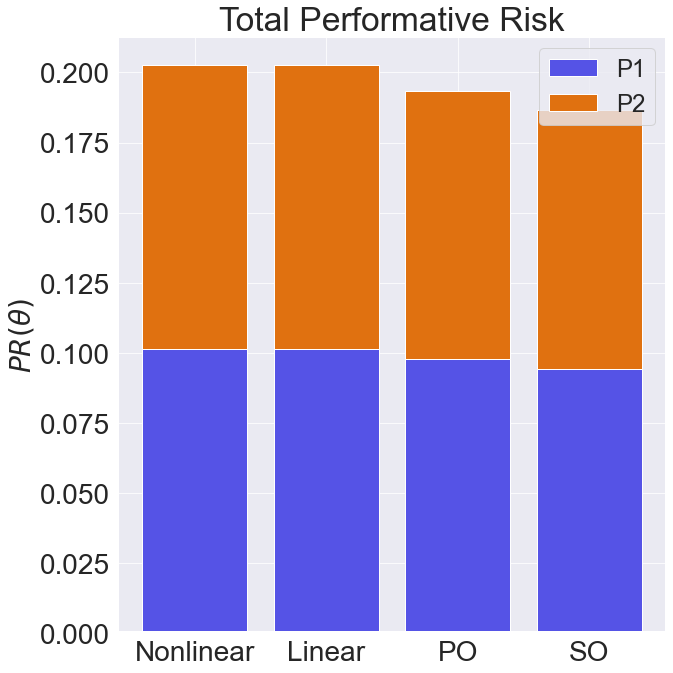

In [16]:
plt.figure(figsize=(10,10))
labels = ['Nonlinear', 'Linear', 'PO', 'SO']
plt.bar((1,2,3,4), (p1_risks[-1],p3_risks[-1],PO_1,SO_1),
        label='P1', tick_label=labels, color='#5553E6')
plt.bar((1,2,3,4), (p2_risks[-1],p4_risks[-1],PO_2,SO_2),
        bottom=(p1_risks[-1],p3_risks[-1],PO_1,SO_1),
        label='P2', color='#E07110')
plt.title('Total Performative Risk')
plt.ylabel(r'$PR(\theta)$')
plt.legend(fontsize=24)
plt.tight_layout()
plt.show()

In [40]:
np.random.seed(37)
p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
num_rounds = 1000000
num_alternate_rounds = 100
num_test = 1000
p1_risks = []
p2_risks = []
theta_final_p1 = []
theta_final_p2 = []
eps_range = np.logspace(-3,3,7)

for epsilon_nl in tqdm(eps_range):
    p1_data_generating_func = lambda x0,x1,x2,x3,x4,x5,x6: sample_from_nonlinear_family(x0,x1,x2,x3,x4,x5,x6,epsilon_nl)
    player_two = TwoStagePlayer()
    player_one = TwoStagePlayer()
    game = DecisionDependentGame(player_one, player_two,
                                 p1_data_params, p2_data_params,
                                 p1_data_generating_func, p2_data_generating_func,
                                 num_rounds, num_alternate_rounds, num_test)
    
    game.run_train()
    game.run_post_train_alternating()
    
    PR1, PR2 = game.evaluate_closed_perf_risk()
    p1_risks.append(PR1)
    p2_risks.append(PR2)
    
    theta_final_p1.append(game.theta_p1)
    theta_final_p2.append(game.theta_p2)
    


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [27:19<00:00, 234.23s/it]


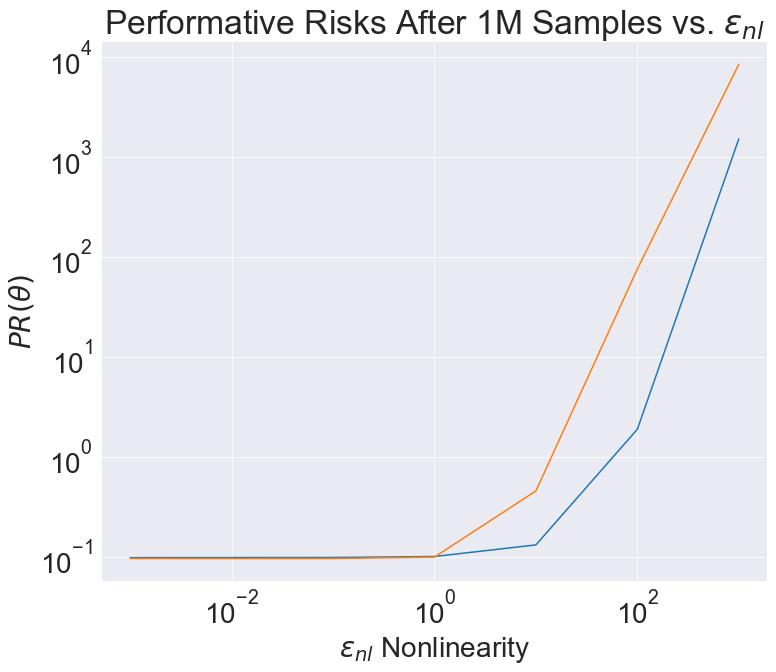

In [44]:
plt.figure(figsize=(12,10))
plt.loglog(eps_range,p1_risks)
plt.loglog(eps_range,p2_risks)
plt.xlabel(r'$\varepsilon_{nl}$ Nonlinearity')
plt.ylabel(r'$PR(\theta)$')
plt.title(r'Performative Risks After 1M Samples vs. $\varepsilon_{nl}$')
plt.savefig('pr_vs_nonlinearity.jpg', format='jpg')
plt.show()

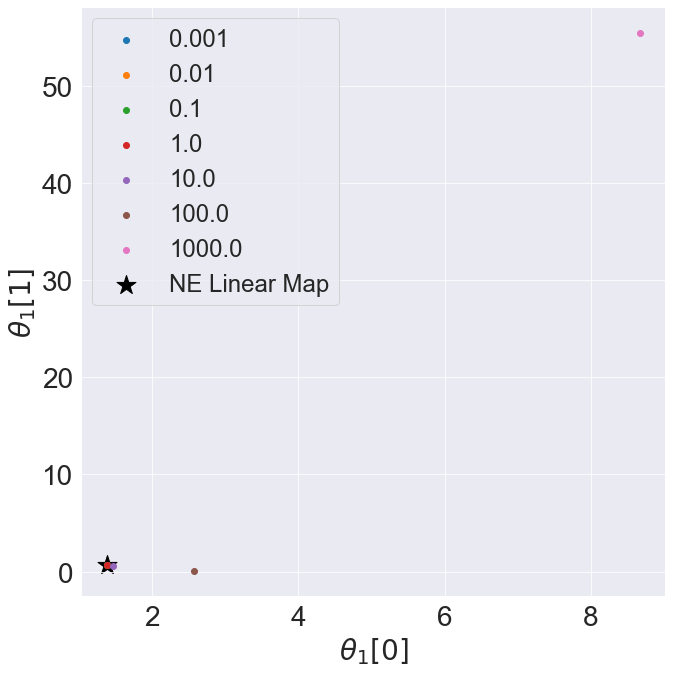

In [45]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 28
plt.rcParams['axes.linewidth'] = 4

for i in range(len(eps_range)):
    x1 = np.array(theta_final_p1)[i,0]
    y1 = np.array(theta_final_p1)[i,1]
    plt.scatter(x1,y1, label=str(eps_range[i]))

x_nash_p1 = theta_PO_1[0]
y_nash_p1 = theta_PO_1[1]
plt.scatter(x_nash_p1, y_nash_p1,
            label='NE Linear Map', marker='*', color='k', s=400, zorder=0)

plt.legend(loc='best',fontsize=24)
plt.xlabel(r"$\theta_1[0]$")
plt.ylabel(r"$\theta_1[1]$")
plt.tight_layout()
plt.savefig('last_iterate_phase_nonlinear.jpg', format='jpg')
plt.show()

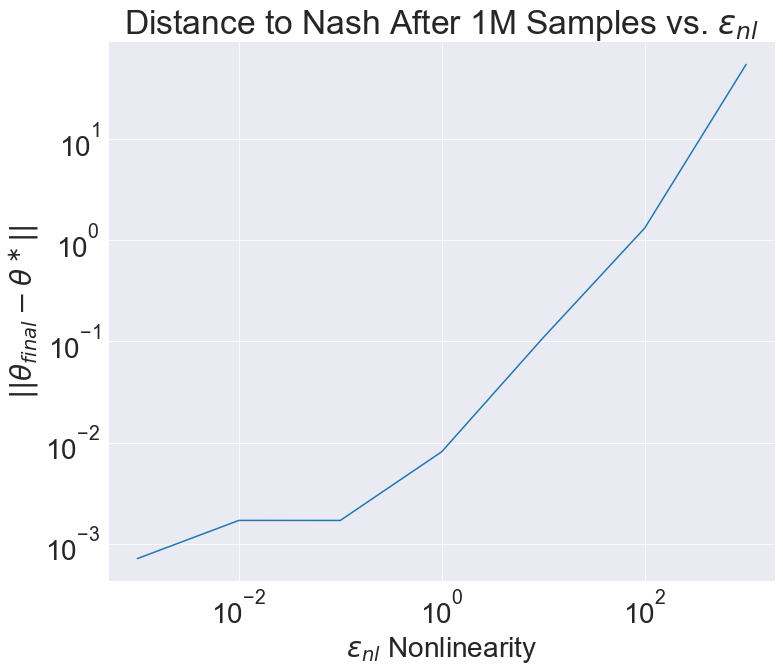

In [46]:
plt.figure(figsize=(12,10))
plt.loglog(eps_range,np.linalg.norm(np.array(theta_final_p1)-np.ones((7,2))*theta_PO_1,axis=1))
plt.xlabel(r'$\varepsilon_{nl}$ Nonlinearity')
plt.ylabel(r'$||\theta_{final}-\theta^\ast||$')
plt.title(r'Distance to Nash After 1M Samples vs. $\varepsilon_{nl}$')
plt.savefig('distance_to_nash_nonlinearity.jpg', format='jpg')
plt.show()